###### Goal - To classify whether a person has diabetes or not using different classifiers

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Reading Data

In [79]:
diabetes = pd.read_csv('datasets_diabetes.csv')
print("Data Features :",diabetes.columns)
diabetes.shape

Data Features : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


(768, 9)

In [80]:
print("Count of different labels:\n ",diabetes.groupby('Outcome').size())

Count of different labels:
  Outcome
0    500
1    268
dtype: int64


In [81]:
#First 5 rows of dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Pre-processing

In [82]:
#Descriptive statistics of the data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
# Counting null values in dataset
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [84]:
# As some features like BMI, Glucose, Blood Pressure should not be zero, let's see how many zeros are there in the dataset 
(diabetes==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

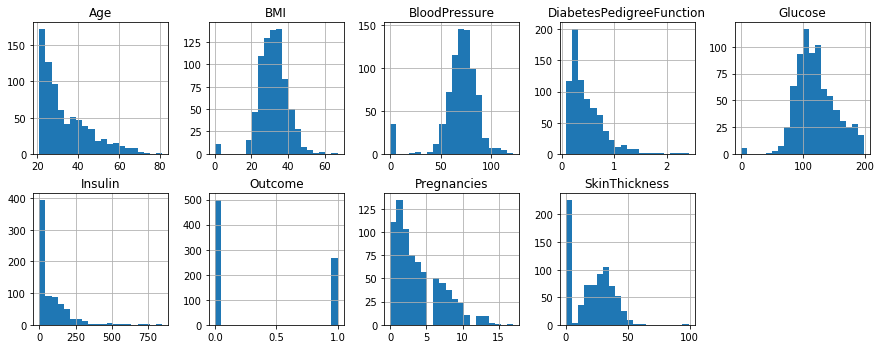

In [85]:
# Visual Histogram for features' distribution
diabetes.hist(bins=20, figsize=(15, 15), layout=(5,5));

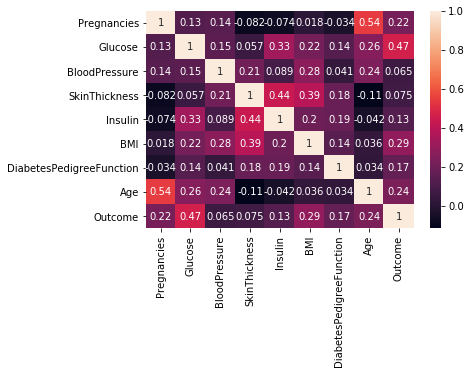

In [86]:
# To know whether there are any correlations between the features
corrMatrix = diabetes.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# plot shows no big correlations between the features

In [87]:
# Removing records having zero values for few features as these values are not valid (Another approach can be to susbstitute minimum value for these zeros)
diabetes_mod=diabetes[(diabetes.Glucose!=0) & (diabetes.BMI!=0) &(diabetes.BloodPressure!=0) ]

In [88]:
#New dataset shape after removing records
diabetes_mod.shape

(724, 9)

In [89]:
# Seperating features and label
X=diabetes_mod.loc[:,diabetes_mod.columns != 'Outcome']
y=diabetes_mod.loc[:,diabetes_mod.columns == 'Outcome']



#### Building Classifiers

In [90]:
# Scaling the data as KNeighborsClassifier is distance dependent, not required for Decision Trees
# Usinskf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)g MinMax scala as it doesn't distort the distribution
scaler = preprocessing.MinMaxScaler() 
X_scaled = scaler.fit_transform(X) 
X_scaled = pd.DataFrame(X_scaled) 

In [91]:
# Using Stratified Shuffle split to seperate testing and training data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

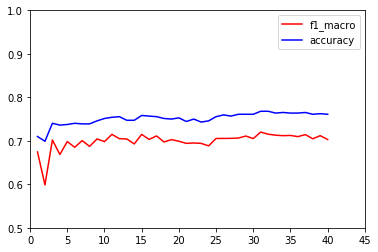

In [92]:
# Using KNeighborsClassifier

x=[]
y1=[]
y2=[]
for i in range(1,41):
    model1 = KNeighborsClassifier(n_neighbors=i)
    t=cross_validate(model1, X_scaled, y.values.ravel(), cv=skf, scoring=('f1_macro', 'accuracy','precision'))
    a1=t['test_f1_macro'].mean()
    a2=t['test_accuracy'].mean()
    x.append(i)
    y1.append(a1)
    y2.append(a2)

plt.ylim(0.5, 1)
plt.xlim(0,45)
plt.plot(x,y1, '-r', label='f1_macro')
plt.plot(x,y2, '-b', label="accuracy")
plt.legend(loc='best')
plt.show()


In [94]:
# selecting n as 12 based on the above graph
knnf = KNeighborsClassifier(n_neighbors=12)
t1=cross_val_score(knnf, X_scaled, y.values.ravel(), cv=skf, scoring='recall').mean()
t2=cross_val_score(knnf, X_scaled, y.values.ravel(), cv=skf, scoring='precision').mean()
t3=cross_val_score(knnf, X_scaled, y.values.ravel(), cv=skf, scoring='f1_macro').mean()
t4=cross_val_score(knnf, X_scaled, y.values.ravel(), cv=skf, scoring='f1_micro').mean()

# storing metrics of this classifier into numpy array
data=np.array([t1,t2,t3,t4])



In [43]:
# Hypertuning parameters using Grid Search CV
parameters={'C':[10**-3, 10**-2, 10**-1,10**0, 10**1, 10**2,10**3],
            'penalty':['l1','l2'],
            'tol':[0.0001,0.001,0.01],
            'fit_intercept':[True,False],
            'intercept_scaling':[0.1,0.01,1,10],
            'warm_start': [True,False],
            'max_iter':[5000]
            }

model2 = LogisticRegression()
clf = GridSearchCV(estimator=model2, param_grid=parameters, cv=skf, scoring='neg_log_loss',n_jobs=-1,verbose=False)
grid_result = clf.fit(X, y.values.ravel())


In [44]:
# Displaying best parameters for above hypertuning
best_params = grid_result.best_params_
print(best_params)

{'C': 1, 'fit_intercept': True, 'intercept_scaling': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'tol': 0.0001, 'warm_start': True}


In [95]:
# Classifying data using Logistic Regression
lrf = LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, intercept_scaling=0.1, random_state=8,warm_start=True,max_iter=5000)

u1=cross_val_score(lrf, X, y.values.ravel(), cv=skf, scoring='recall').mean()
u2=cross_val_score(lrf, X, y.values.ravel(), cv=skf, scoring='precision').mean()
u3=cross_val_score(lrf, X, y.values.ravel(), cv=skf, scoring='f1_macro').mean()
u4=cross_val_score(lrf, X, y.values.ravel(), cv=skf, scoring='f1_micro').mean()

data=np.vstack((data,[u1,u2,u3,u4]))

In [47]:
parameterstree={"criterion":['gini','entropy'],
              "max_depth": range(1,8),
              "min_samples_split": range(2,8),
              "min_samples_leaf":range(1,8) 
                    }


tree = DecisionTreeClassifier()

clf = GridSearchCV(estimator=tree, param_grid=parameterstree, cv=skf,n_jobs=-1,verbose=False)
grid_result = clf.fit(X, y.values.ravel())

best_params = grid_result.best_params_
print(best_params)



{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 3}


In [96]:
# Classifying data using Decision Tree
d1=DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 6, min_samples_split= 3, random_state=8)
v1=cross_val_score(d1, X, y.values.ravel(), cv=skf, scoring='recall').mean()
v2=cross_val_score(d1, X, y.values.ravel(), cv=skf, scoring='precision').mean()
v3=cross_val_score(d1, X, y.values.ravel(), cv=skf, scoring='f1_macro').mean()
v4=cross_val_score(d1, X, y.values.ravel(), cv=skf, scoring='f1_micro').mean()

data=np.vstack((data,[v1,v2,v3,v4]))

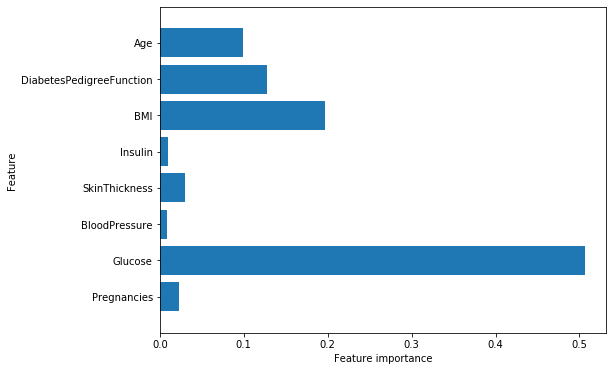

In [97]:
# Calcuting features importance for Decision Tree Classifier
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
d1.fit(X, y)

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(d1)
plt.savefig('feature_importance')

In [51]:
parameterstree={"criterion":['gini','entropy'],
              "max_depth": range(1,8),
              "min_samples_split": range(2,8),
              "min_samples_leaf":range(2,8) 
                    }


rfc = RandomForestClassifier()

clf = GridSearchCV(estimator=rfc, param_grid=parameterstree, cv=skf,n_jobs=-1,verbose=False)
grid_result = clf.fit(X, y.values.ravel())

best_params = grid_result.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [98]:
r1=RandomForestClassifier(n_estimators=300, criterion= 'gini', max_depth= 5, min_samples_leaf= 3, min_samples_split= 6, random_state=8, oob_score=True, max_features=5)
w1=cross_val_score(r1, X, y.values.ravel(), cv=skf, scoring='recall').mean()
w2=cross_val_score(r1, X, y.values.ravel(), cv=skf, scoring='precision').mean()
w3=cross_val_score(r1, X, y.values.ravel(), cv=skf, scoring='f1_macro').mean()
w4=cross_val_score(r1, X, y.values.ravel(), cv=skf, scoring='f1_micro').mean()

data=np.vstack((data,[w1,w2,w3,w4]))


Input Data with last row newly added:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,2.0,150.0,80.0,21.0,34.0,28.0,0.500,30.0


Predicting the outcome when threshold is 0.4:  [1 0 0]
oob score: 0.7624309392265194


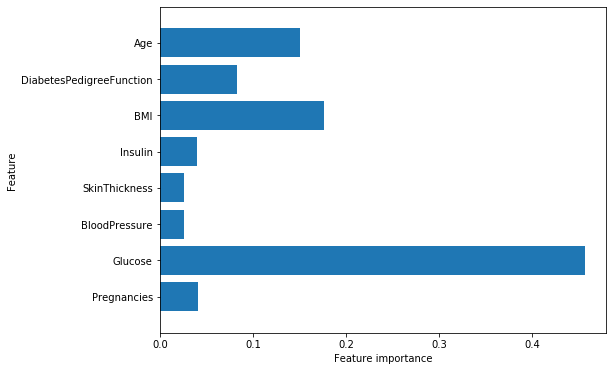

In [99]:
# Predicting a new set of input
a=X.loc[0:1,:]
a.loc[len(a)]=[2,150,80,21,34,28,0.5,30]
print("Input Data with last row newly added:")
display(a)
r1.fit(X,y.values.ravel())
predict = r1.predict_proba(a)
threshold = 0.4
er=(predict[:,1]>=threshold).astype('int')
print("Predicting the outcome when threshold is 0.4: ",er)


# Calcuting features importance for Random Forest Classifier
plot_feature_importances_diabetes(r1)

# Out of bag score for Random Forest Classifier
print("oob score:", r1.oob_score_)

In [70]:
parameterstree={"criterion":['friedman_mse','mse', 'mae'],
              "max_depth": range(3,6),
              "min_samples_split": range(3,6),
              "min_samples_leaf":range(3,6),
              "learning_rate":(0.1,0.2),
              "max_features":(4,5,6)
               }



gbc = GradientBoostingClassifier()

clf = GridSearchCV(estimator=gbc, param_grid=parameterstree, cv=skf,n_jobs=-1,verbose=False)
grid_result = clf.fit(X, y.values.ravel())

best_params = grid_result.best_params_
print(best_params)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [100]:
g1=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1, n_estimators=300, max_depth= 5, min_samples_leaf= 4, min_samples_split= 4, random_state=8, max_features=5)
s1=cross_val_score(g1, X, y.values.ravel(), cv=skf, scoring='recall').mean()
s2=cross_val_score(g1, X, y.values.ravel(), cv=skf, scoring='precision').mean()
s3=cross_val_score(g1, X, y.values.ravel(), cv=skf, scoring='f1_macro').mean()
s4=cross_val_score(g1, X, y.values.ravel(), cv=skf, scoring='f1_micro').mean()

data=np.vstack((data,[s1,s2,s3,s4]))

In [101]:
data=np.transpose(data)
print(data)

[[0.49787755 0.56628571 0.64612245 0.56620408 0.59428571]
 [0.70570422 0.72254596 0.67475397 0.6959589  0.66062622]
 [0.70499214 0.7365808  0.73934207 0.72204677 0.71644876]
 [0.75551724 0.77623563 0.76657088 0.76245211 0.75138889]]


In [102]:
metrics=pd.DataFrame(data,index=['Recall','Precision','f1_macro','f1_micro'],columns=['KNeighbors','LogisticRegression','DecisionTree','RandomForest','GradientBoost'])
print("Metrics of all Classifiers combined: ")
metrics.round(3)

Metrics of all Classifiers combined: 


,KNeighbors,LogisticRegression,DecisionTree,RandomForest,GradientBoost
Recall,0.498,0.566,0.646,0.566,0.594
Precision,0.706,0.723,0.675,0.696,0.661
f1_macro,0.705,0.737,0.739,0.722,0.716
f1_micro,0.756,0.776,0.767,0.762,0.751


##### Analysis

1. It's important to classify people having diabetes correctly (recall) more so than precision (as having few false positives is ok but having false negatives is not)

2. The data is not heavily inbalanced towards any one label, so overall classification metric is considered

Either Decision Tree or Gradient Boost can be considered for the classification

